In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/reecewu/Desktop/DAproject/ML_Linear Regression_240127/rowdata.xlsx')

df.head()

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,222000.0,5.346353,1,0.0,6.3,2016
1,Mercedes-Benz,177000.0,5.247973,1,0.0,5.5,2016
2,Mercedes-Benz,177777.0,5.249876,1,0.0,5.5,2016
3,Mercedes-Benz,199999.0,5.301028,1,0.0,5.5,2016
4,Mercedes-Benz,199999.0,5.301028,1,0.0,5.5,2016


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        4003 non-null   object 
 1   Price        4003 non-null   float64
 2   log_price    4003 non-null   float64
 3   Mileage      4003 non-null   int64  
 4   log_mileage  4003 non-null   float64
 5   EngineV      4003 non-null   float64
 6   Year         4003 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 219.0+ KB


### Regression Assumption: Linearity

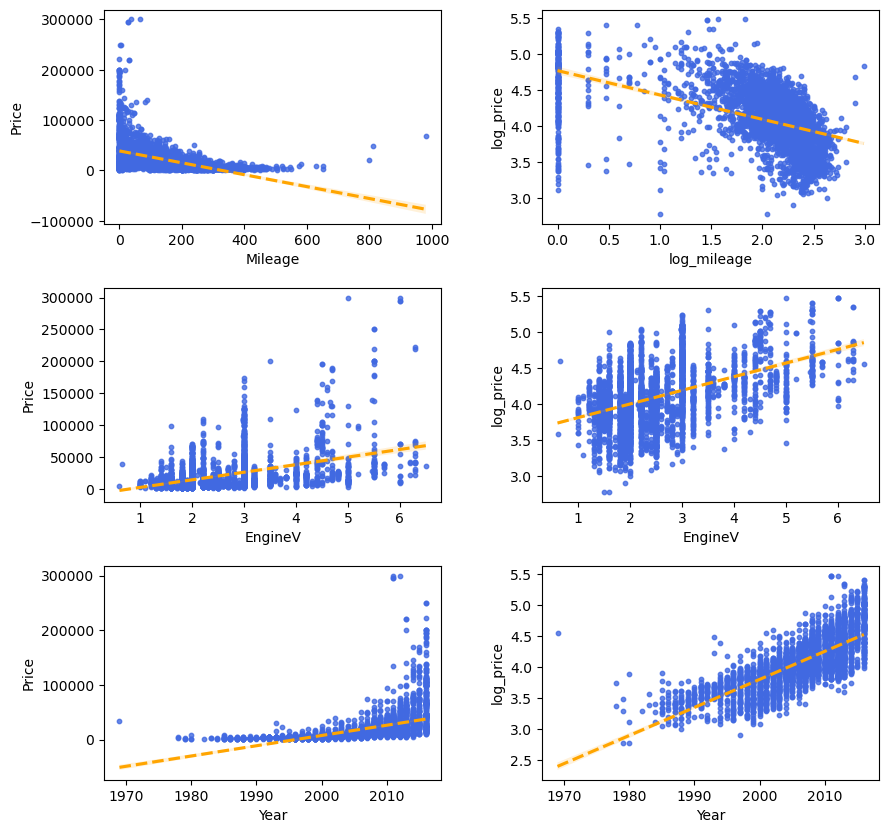

In [4]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

sns.regplot(x = 'Mileage', y = 'Price', data = df, ax = axes[0,0], 
            scatter_kws = {'s': 10, 'color': 'royalblue'}, line_kws = {'color': 'orange', 'linestyle': '--'})

sns.regplot(x = 'EngineV', y = 'Price', data = df, ax = axes[1,0], 
            scatter_kws = {'s': 10, 'color': 'royalblue'}, line_kws = {'color': 'orange', 'linestyle': '--'})

sns.regplot(x = 'Year', y = 'Price', data = df, ax = axes[2,0], 
            scatter_kws = {'s': 10, 'color': 'royalblue'}, line_kws = {'color': 'orange', 'linestyle': '--'})

sns.regplot(x = 'log_mileage', y = 'log_price', data = df, ax = axes[0,1], 
            scatter_kws = {'s': 10, 'color': 'royalblue'}, line_kws = {'color': 'orange', 'linestyle': '--'})

sns.regplot(x = 'EngineV', y = 'log_price', data = df, ax = axes[1,1], 
            scatter_kws = {'s': 10, 'color': 'royalblue'}, line_kws = {'color': 'orange', 'linestyle': '--'})

sns.regplot(x = 'Year', y = 'log_price', data = df, ax = axes[2,1], 
            scatter_kws = {'s': 10, 'color': 'royalblue'}, line_kws = {'color': 'orange', 'linestyle': '--'})

plt.show()

#### Takeaway

When we use three variables with the "Price" variable (left side), the results are not ideal.

Therefore, we use log transformation to solve this problem, we transform the variable "Price" into "log_price" and find that the results are improved.

And we also try to convert one of the x variables "Mileage" to "log_mileage" and see if there is a positive impact on the results.

### Regression Assumption: No endogeneity

#### Takeaway

Endogeneity: "Omitted variable bias" means we forgot to include the relevant variable, so it goes into the error term.

It is necessary to find possible omitted variables through domain knowledge and literature review. 

In this case, we did not violate this assumption.

### Regression Assumption: Normality and homoscedasticity

#### Takeaway

Normality: Through the central limit theorem, under large samples, we can assume that the error term is normally distributed.

Homoscedasticity: The homoscedasticity holds since we can see the previous regression plot distribution. (Thanks for log transformation)

### Regression Assumption: No multicollinearity

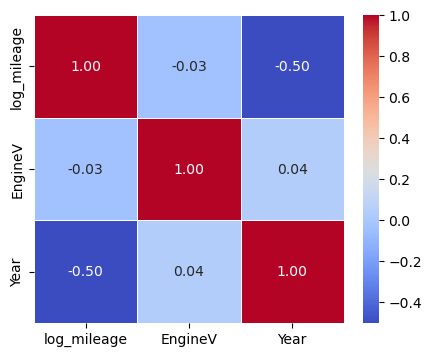

In [5]:
correlation_matrix = df[['log_mileage', 'EngineV', 'Year']].corr(numeric_only = True)

plt.figure(figsize = (5, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

#### Takeaway

The correlation coefficient between variables is not high (usually above 0.7 is considered a strong correlation),

so we can assume that there is no multicollinearity.

### Handle categorical variables

In [6]:
# one-hot encoding

def convert_dummy(df, feature):
    pos = pd.get_dummies(df[feature], prefix = feature)
    mode = df[feature].value_counts().index[0]
    biggest = feature + '_' + mode
    pos.drop([biggest], axis = 1, inplace = True)
    df.drop([feature], axis = 1, inplace = True)
    df = df.join(pos)
    
    return df

In [7]:
# Categorical Features: Brand

df = convert_dummy(df, 'Brand')

df.head()

,Price,log_price,Mileage,log_mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota
0,222000.0,5.346353,1,0.0,6.3,2016,0,0,1,0,0,0
1,177000.0,5.247973,1,0.0,5.5,2016,0,0,1,0,0,0
2,177777.0,5.249876,1,0.0,5.5,2016,0,0,1,0,0,0
3,199999.0,5.301028,1,0.0,5.5,2016,0,0,1,0,0,0
4,199999.0,5.301028,1,0.0,5.5,2016,0,0,1,0,0,0


## Machine Learning: Linear Regression

In [8]:
# Feature column X and targer column y

y = df['log_price']

X = df.drop(['Price', 'log_price', 'Mileage'], axis = 1)

In [9]:
# Split and training set test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
np.random.seed(42)

In [10]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

### Regression Assumption: No autocorrelation

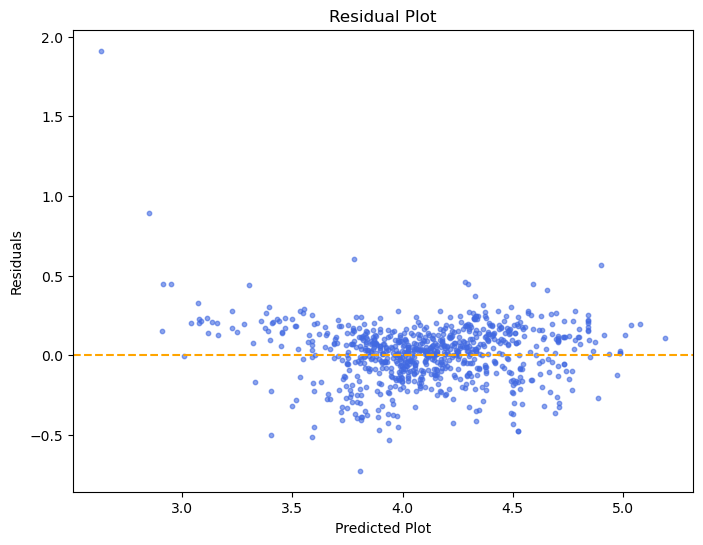

In [12]:
residuals = y_test - y_pred

plt.figure(figsize = (8, 6))
plt.scatter(y_pred, residuals, s = 10, alpha = 0.6, color = 'royalblue', marker = 'o')
plt.axhline(y = 0, color = 'orange', linestyle = '--')
plt.title('Residual Plot')
plt.xlabel('Predicted Plot')
plt.ylabel('Residuals')
plt.show()

#### Takeaway

We did not observe a specific pattern for Residuals, so the assumption was not violated.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r_squared: {r_squared}')

mse: 0.03403204553152408
rmse: 0.1844777643281815
mae: 0.1345176198249453
r_squared: 0.794983446680045


In [14]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1795.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:37:46   Log-Likelihood:                 1175.8
No. Observations:                4003   AIC:                            -2332.
Df Residuals:                    3993   BIC:                            -2269.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -78.4060      1.016    -77.162      0.000     -80.398     -76.414
log_mileage            -0.1073      0.005    -20.191      0.000      -0.118      -0.097
EngineV                 0.1394      0.003     41.597      0.000       0.133       0.146
Year                    0.0410      0.001     81.429      0.000       0.040       0.042
Brand_Audi              0.0581      0.011      5.294      0.000       0.037       0.080
Brand_BMW               0.1085      0.010     10.965      0.000       0.089       0.128
Brand_Mercedes-Benz     0.1037      0.009     10.971      0.000       0.085       0.122
Brand_Mitsubishi       -0.0488      0.012     -4.060      0.000      -0.072      -0.025
Brand_Renault          -0.1605      0.011    -15.037      0.000      -0.181      -0.140
Brand_Toyota            0.0407      0.010      3.908      0.000       0.020       0.061
==============================================================================
Omnibus:                      409.526   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2948.036
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                       7.188   Cond. No.                     7.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""